<a href="https://colab.research.google.com/github/CharlesPrado23/Notebooks/blob/main/Semana10/K_means(Geolocation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -o -j /content/drive/MyDrive/GPS/properties_2016.csv.zip

Archive:  /content/drive/MyDrive/GPS/properties_2016.csv.zip
  inflating: properties_2016.csv     


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv('properties_2016.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df.head()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [38]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [39]:
df_filt = df.loc[:,['unitcnt','latitude','longitude']]
df_filt

,unitcnt,latitude,longitude
0,NaN,34144442.0,-118654084.0
1,NaN,34140430.0,-118625364.0
2,2.0,33989359.0,-118394633.0
3,NaN,34148863.0,-118437206.0
4,1.0,34194168.0,-118385816.0
...,...,...,...
2973775,1.0,34769356.0,-118553521.0
2973776,1.0,34087735.0,-118063008.0
2973777,1.0,33951985.0,-118124097.0
2973778,1.0,34041100.0,-118234000.0


In [40]:

k=3
property_clustering = df_filt.drop(['unitcnt'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(property_clustering)
kmeans.labels_
df_filt.insert(0, 'Cluster Labels', kmeans.labels_)

# Avaliando Clusterização usando Elbow 

# In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use

# $ minimize\Bigg(\sum^k_{k=1}W(C_k)\Bigg) $

# where $C_k$ is the  $ k^{th} $ cluster and $W(C_k)$ is the within-cluster variation

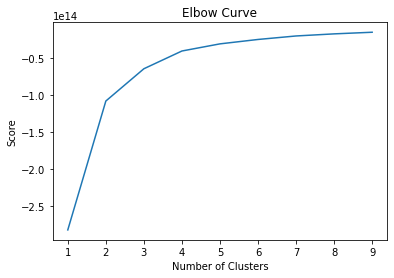

In [34]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_filt[['latitude']]
X_axis = df_filt[['longitude']]
score = [kmeans[i].fit(property_clustering).score(property_clustering) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
silh_df = property_clustering.iloc[1:20000,:]
for i in range(2,5):
  kmeans_ = KMeans(n_clusters=i).fit(silh_df)
  labels_ = kmeans_.labels_
  coef = silhouette_score(silh_df,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 2, score: 0.42298374368238195
N_cluster: 3, score: 0.4377830520289022
N_cluster: 4, score: 0.4101052983670851


In [43]:
df_filt

,Cluster Labels,unitcnt,latitude,longitude
0,2,NaN,34144442.0,-118654084.0
1,2,NaN,34140430.0,-118625364.0
2,0,2.0,33989359.0,-118394633.0
3,0,NaN,34148863.0,-118437206.0
4,0,1.0,34194168.0,-118385816.0
...,...,...,...,...
2973775,2,1.0,34769356.0,-118553521.0
2973776,0,1.0,34087735.0,-118063008.0
2973777,0,1.0,33951985.0,-118124097.0
2973778,0,1.0,34041100.0,-118234000.0


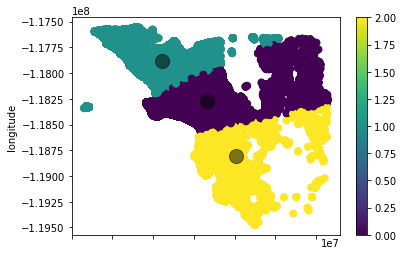

In [44]:

centers = kmeans.cluster_centers_
labels  = kmeans.labels_
df_filt.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [45]:

df6 = df_filt.groupby('Cluster Labels')['unitcnt'].mean()

In [46]:
df6.head()

Cluster Labels
0    1.200309
1    1.183078
2    1.046109
Name: unitcnt, dtype: float64